# To segment the cars into various categories using K-means Clustering applying on the Car Dataset

In [1]:
#select TensorFlow version 2.x in colab
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.15.0'

In [2]:
# Initialize the random number generator
import random
random.seed(0)
# Ignore the warnings?
import warnings
warnings.filterwarnings("ignore")

In [3]:
# To establish the link between file present in drive and google colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# import all the necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Data Reading

# A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable

In [9]:
# to read dataset
carname=pd.read_csv('/content/drive/MyDrive/CHEATES/Car name.csv')
carname.head() # to display the first five rows of the dataset

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [10]:
carname.shape # to get the shape of dataset

(398, 1)

In [12]:
carname.info() # to get the information of dataset includes datatype and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_name  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


# B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable

In [13]:
# to open JSON file
f = open ('/content/drive/MyDrive/CHEATES/Car-Attributes.json', "r")
# Reading from file
data= json.loads(f.read())

In [14]:
car_attr=pd.DataFrame(data) # to obtian the json file data in dataframe form
car_attr.head() # to display the first five rows of the dataset

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [15]:
car_attr.shape # to get the shape of dataset

(398, 8)

In [16]:
car_attr.info()  # to get the information of dataset includes datatype and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [17]:
car_attr.isnull().sum() # to verify the null values present in each feature

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

# C.  Check for unexpected values in all the features and datapoints with such values.

In [18]:
# isdigit()? on 'horsepower'
hpIsDigit = pd.DataFrame(car_attr.hp.str.isdigit())  # if the string is made of digits store True else False
car_attr[hpIsDigit['hp'] == False]   # from temp take only those rows where hp has false

,mpg,cyl,disp,hp,wt,acc,yr,origin
32,25.0,4,98.0,?,2046,19.0,71,1
126,21.0,6,200.0,?,2875,17.0,74,1
330,40.9,4,85.0,?,1835,17.3,80,2
336,23.6,4,140.0,?,2905,14.3,80,1
354,34.5,4,100.0,?,2320,15.8,81,2
374,23.0,4,151.0,?,3035,20.5,82,1


In [19]:
# Missing values have a '?' , replace with NaN
car_attr = car_attr.replace('?', np.nan)
car_attr[hpIsDigit['hp'] == False]

,mpg,cyl,disp,hp,wt,acc,yr,origin
32,25.0,4,98.0,NaN,2046,19.0,71,1
126,21.0,6,200.0,NaN,2875,17.0,74,1
330,40.9,4,85.0,NaN,1835,17.3,80,2
336,23.6,4,140.0,NaN,2905,14.3,80,1
354,34.5,4,100.0,NaN,2320,15.8,81,2
374,23.0,4,151.0,NaN,3035,20.5,82,1


In [20]:
#instead of dropping the rows, lets replace the missing values with median value.
car_attr.median() # to obtain the median value of each attribute

mpg         23.0
cyl          4.0
disp       148.5
hp          93.5
wt        2803.5
acc         15.5
yr          76.0
origin       1.0
dtype: float64

In [21]:
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
medianFiller = lambda x: x.fillna(x.median())
car_attr = car_attr.apply(medianFiller,axis=0)
car_attr['hp'] = car_attr['hp'].astype('float64')  # converting the hp column from object / string type to float

In [22]:
car_attr.info() # to get the information of dataset includes datatype and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    float64
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


# D. Merge both the DataFrames together to form a single DataFrame [2 Mark]

In [23]:
car_info=carname.join(car_attr.iloc[:],how='right')
car_info

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1


In [24]:
car_info.info() # to get the information of dataset includes datatype and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


# E. Print 5 point summary of the numerical features and share insights.

In [25]:
car_info_num=car_info.iloc[:,1:9] # to obtain the numerical features from the dataset
car_info_num

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [26]:
car_info_num.info() # to get the information of dataset includes datatype and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    float64
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [27]:
car_info_num.describe() # to get descriptive statistics

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


From the above statistics, we can say that there is no skewness present in the data as the variation between min,50% and max values are in normal range.
That is the data is not too much deviated towards min or max from its 50% value.

In [28]:
car_info.corr() # to obtain correlation between each feature

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
hp,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
wt,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


# Data PRE-PROCESSING


# A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [29]:
percent_missing = car_info.isnull().sum() * 100 / len(car_info) # to get the feature wise percentage of null values
percent_missing

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

In [30]:
car_info.isnull().sum() # to check null values present in the dataset

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

# B. Check for duplicate values in the data and impute with the best suitable approach.

In [31]:
dupes = car_info.duplicated() # rechecking the duplicate values
sum(dupes)

0

# C. Plot a pairplot for all features.

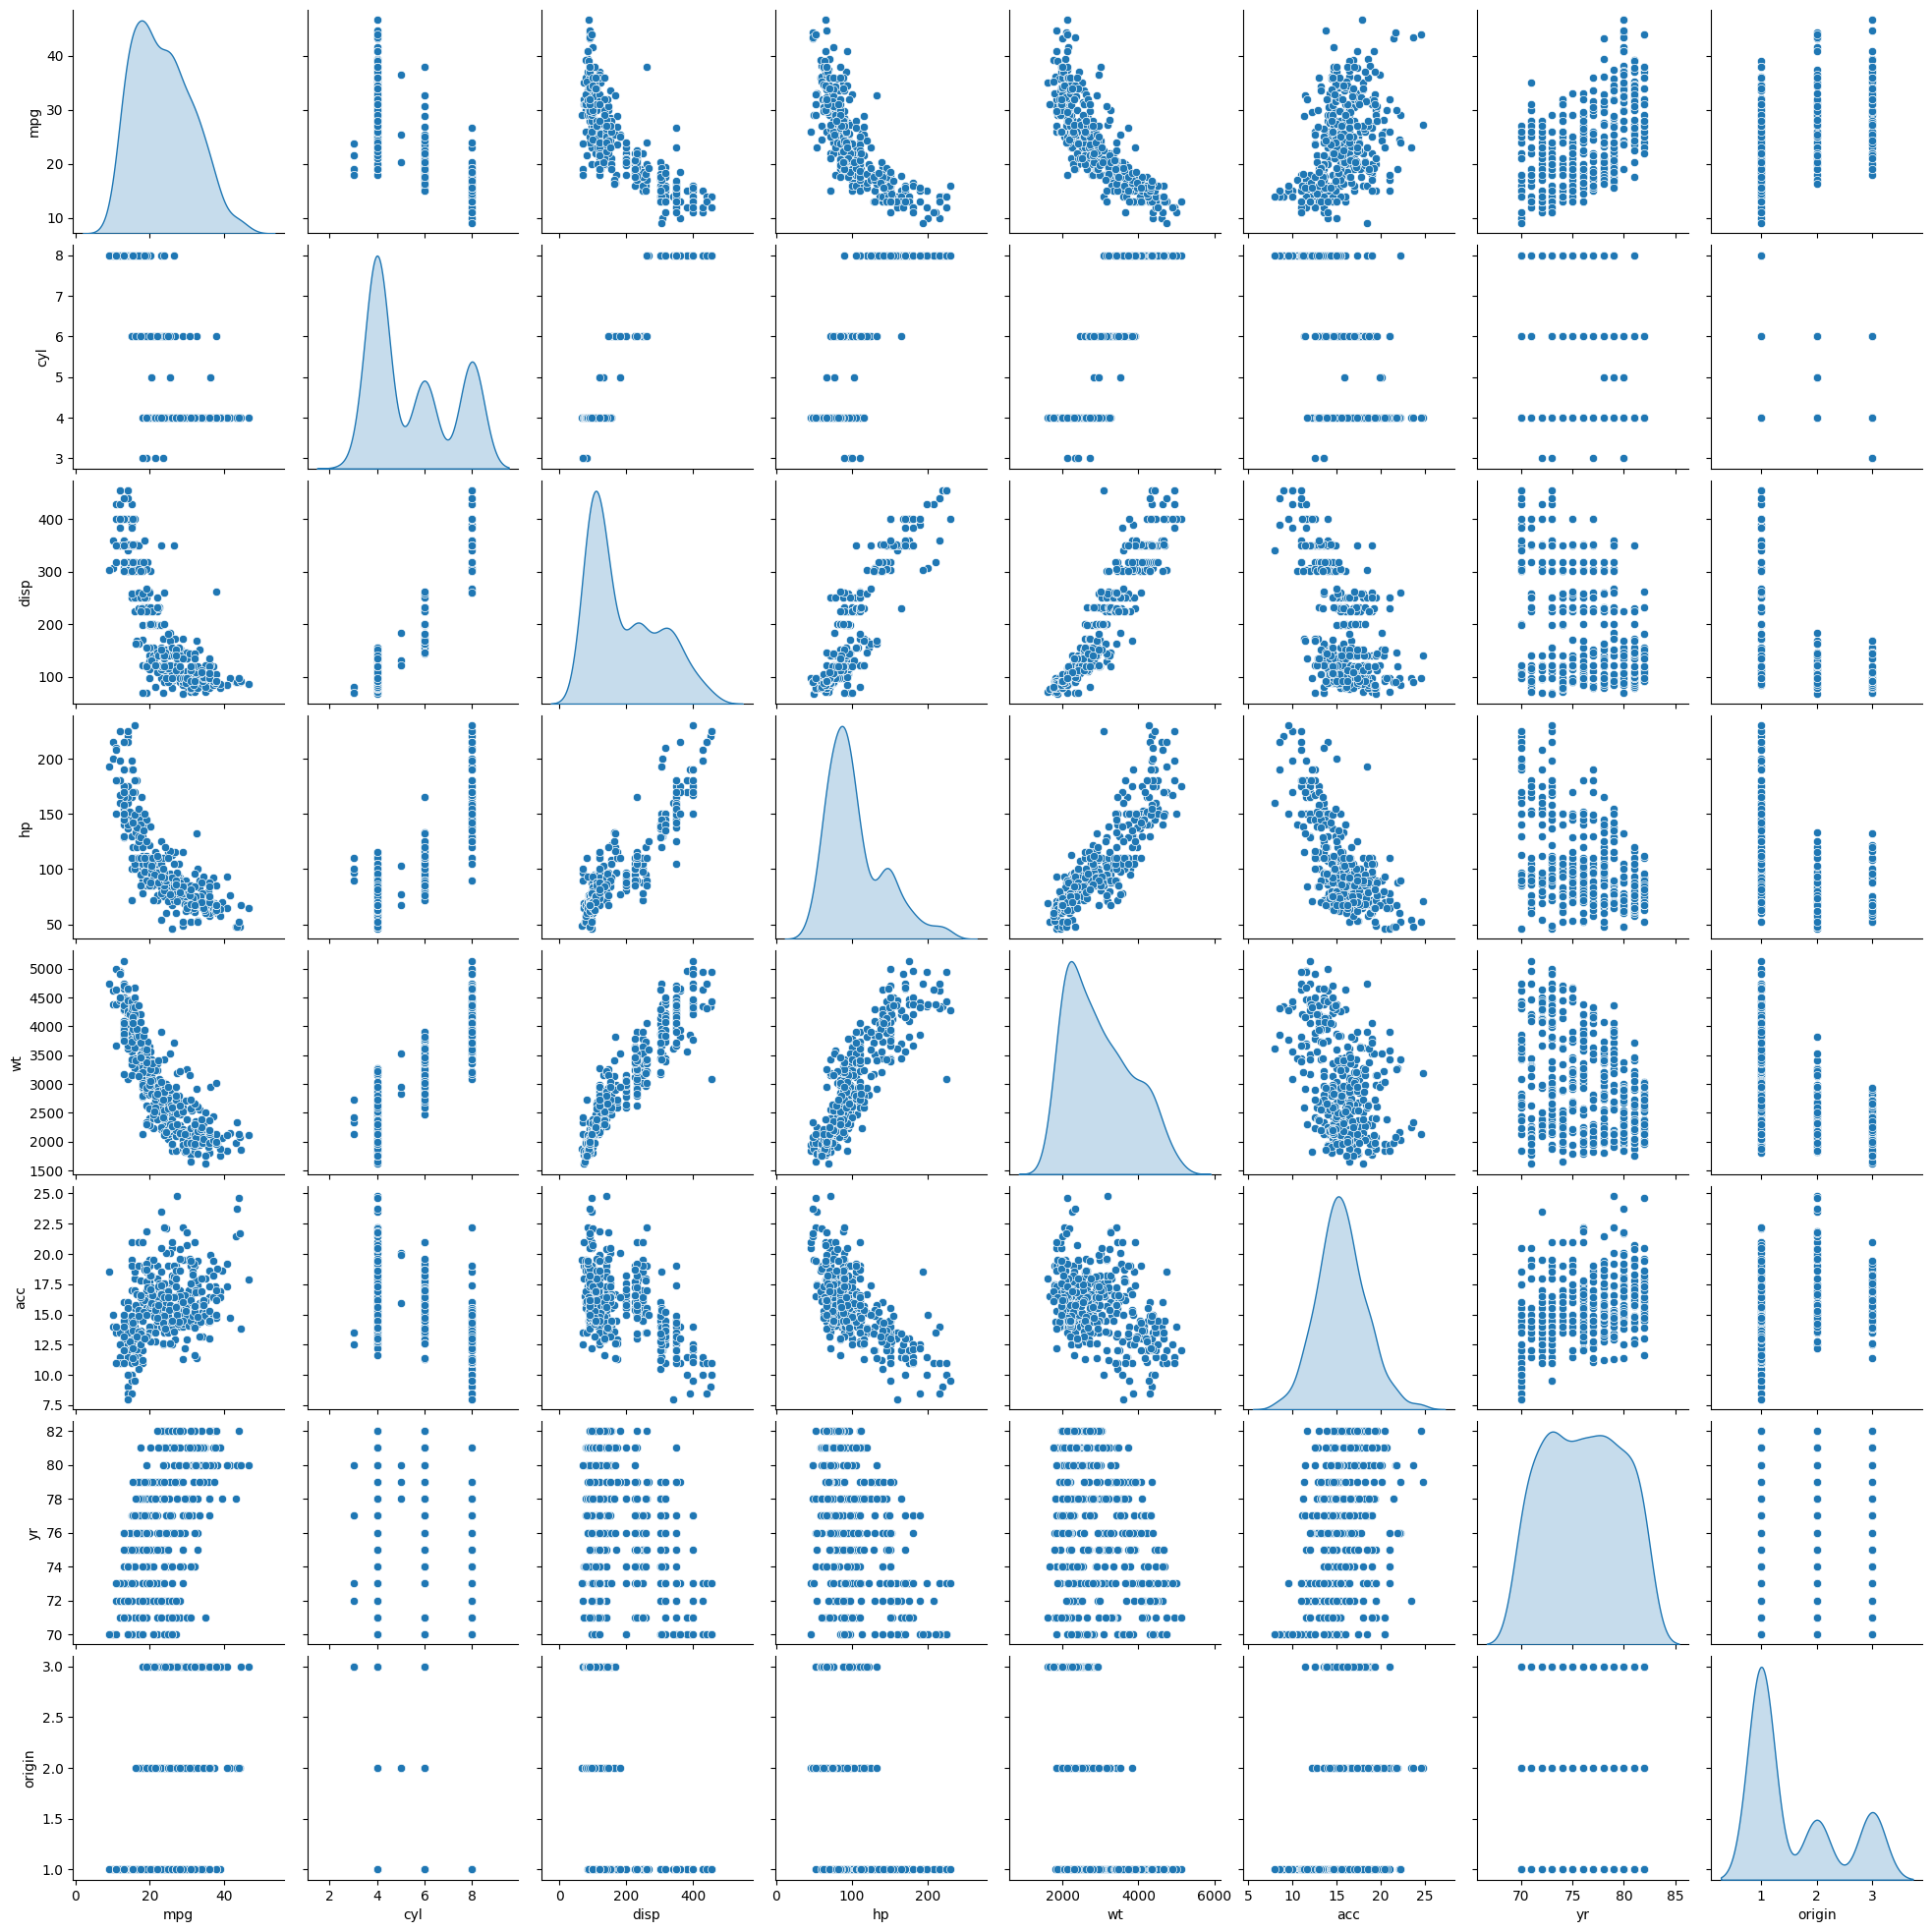

In [32]:
sns.pairplot(car_info,diag_kind='kde') # to display the pair plot between all numerical features
plt.show()

         From the correlation matrix and pairplot there exist a positive correlation between displacement and weight of the car(0.93). Number of cyllinders per car and weight of it (0.89) and also no.of cyllinders per car and displacement that it can takes place(0.95)    
         
    Its been observed that from the above plot:
        1. As the number of cyllinders per car increases leads to the increased weight of each car.
        2. As the car weight is increasing the displacement that it takes place also  increases.
        3. More number of cyllinders per car will have much displacement that it can take.

# MODEL BUILDING

# A. Apply K-Means clustering for 2 to 10 clusters and Plot a visual and find elbow point.

In [33]:
# import necessary metrics
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
import sklearn.metrics

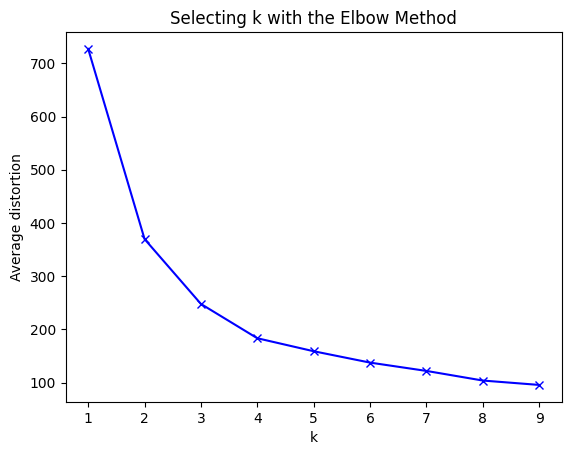

In [34]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(car_info_num)
    prediction=model.predict(car_info_num)
    meanDistortions.append(sum(np.min(cdist(car_info_num, model.cluster_centers_, 'euclidean'), axis=1)) / car_info_num
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

# To highlight which are the possible Elbow points

In [35]:
# import necessary functions
from yellowbrick.cluster.elbow import kelbow_visualizer

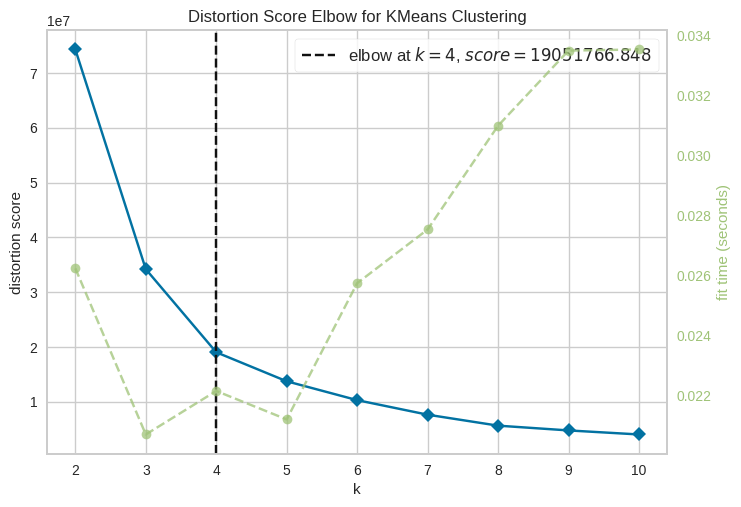

In [36]:
#The KElbowVisualizer implements the “elbow” method to select the optimal number of clusters by fitting the model with a range of values for K
model = kelbow_visualizer(KMeans(),car_info_num, k=10)


        Therefore from the above plot,the optimum value of k is 4 and the elbow points we can choose any where from 4, 5, 6 to 10

# B. Train a K-means clustering model once again on the optimal number of clusters

In [37]:
# scale the data
car_infoScaled=car_attr.apply(zscore)
car_infoScaled

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.715145
...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,-0.715145
394,2.624265,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0.533222
395,1.087017,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,-0.715145
396,0.574601,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,-0.715145


In [38]:
#case-(i)
# Let us first start with K = 4, the optimum value of k
final_model=KMeans(4)
final_model.fit(car_infoScaled)
prediction=final_model.predict(car_infoScaled)

# C . Add a new feature in the DataFrame which will have labels based upon cluster value

In [39]:
#Append the prediction
car_infoScaled["GROUP"] = prediction
print("Groups Assigned : \n")
car_infoScaled

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145,1
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145,1
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145,1
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145,1
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.715145,1
...,...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,-0.715145,0
394,2.624265,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0.533222,0
395,1.087017,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,-0.715145,0
396,0.574601,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,-0.715145,0


# Final model

In [40]:
#case-(ii)
# Let us first start with K = 5, the optimum value of 5
final_model=KMeans(5)
final_model.fit(car_infoScaled)
prediction=final_model.predict(car_infoScaled)
#Append the prediction
car_infoScaled["GROUP"] = prediction
print("Groups Assigned : \n")
car_infoScaled

Groups Assigned : 



,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145,3
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145,3
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145,3
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145,3
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.715145,3
...,...,...,...,...,...,...,...,...,...
393,0.446497,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,-0.715145,4
394,2.624265,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0.533222,1
395,1.087017,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,-0.715145,4
396,0.574601,-0.856321,-0.705077,-0.662850,-0.408411,1.100822,1.621983,-0.715145,4
